In [55]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')


# Load dataset

In [95]:
# Load articles, customers, and transactions data
articles = pd.read_csv('articles.csv')
customers = pd.read_csv('customers.csv')
transactions = pd.read_csv('transactions_train.csv')

# Drop missing values from transactions
transactions.dropna(inplace=True)


In [57]:
articles.head()

article_id  product_code          prod_name  product_type_no  \
0   108775015        108775          Strap top              253   
1   108775044        108775          Strap top              253   
2   108775051        108775      Strap top (1)              253   
3   110065001        110065  OP T-shirt (Idro)              306   
4   110065002        110065  OP T-shirt (Idro)              306   

  product_type_name  product_group_name  graphical_appearance_no  \
0          Vest top  Garment Upper body                  1010016   
1          Vest top  Garment Upper body                  1010016   
2          Vest top  Garment Upper body                  1010017   
3               Bra           Underwear                  1010016   
4               Bra           Underwear                  1010016   

  graphical_appearance_name  colour_group_code colour_group_name  ...  \
0                     Solid                  9             Black  ...   
1                     Solid                 10             White  ...   
2                    Stripe                 11         Off White  ...   
3                     Solid                  9             Black  ...   
4                     Solid                 10             White  ...   

   department_name index_code        index_name index_group_no  \
0     Jersey Basic          A        Ladieswear              1   
1     Jersey Basic          A        Ladieswear              1   
2     Jersey Basic          A        Ladieswear              1   
3   Clean Lingerie          B  Lingeries/Tights              1   
4   Clean Lingerie          B  Lingeries/Tights              1   

   index_group_name section_no            section_name garment_group_no  \
0        Ladieswear         16  Womens Everyday Basics             1002   
1        Ladieswear         16  Womens Everyday Basics             1002   
2        Ladieswear         16  Womens Everyday Basics             1002   
3        Ladieswear         61         Womens Lingerie             1017   
4        Ladieswear         61         Womens Lingerie             1017   

   garment_group_name                                        detail_desc  
0        Jersey Basic            Jersey top with narrow shoulder straps.  
1        Jersey Basic            Jersey top with narrow shoulder straps.  
2        Jersey Basic            Jersey top with narrow shoulder straps.  
3   Under-, Nightwear  Microfibre T-shirt bra with underwired, moulde...  
4   Under-, Nightwear  Microfibre T-shirt bra with underwired, moulde...  

[5 rows x 25 columns]

In [58]:
customers.head()

customer_id   FN  Active  \
0  00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...  NaN     NaN   
1  0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...  NaN     NaN   
2  000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...  NaN     NaN   
3  00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...  NaN     NaN   
4  00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...  1.0     1.0   

  club_member_status fashion_news_frequency   age  \
0             ACTIVE                   NONE  49.0   
1             ACTIVE                   NONE  25.0   
2             ACTIVE                   NONE  24.0   
3             ACTIVE                   NONE  54.0   
4             ACTIVE              Regularly  52.0   

                                         postal_code  
0  52043ee2162cf5aa7ee79974281641c6f11a68d276429a...  
1  2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...  
2  64f17e6a330a85798e4998f62d0930d14db8db1c054af6...  
3  5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...  
4  25fa5ddee9aac01b35208d01736e57942317d756b32ddd...

In [59]:
transactions.head()

t_dat                                        customer_id  article_id  \
0  2018-09-20  000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...   663713001   
1  2018-09-20  000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...   541518023   
2  2018-09-20  00007d2de826758b65a93dd24ce629ed66842531df6699...   505221004   
3  2018-09-20  00007d2de826758b65a93dd24ce629ed66842531df6699...   685687003   
4  2018-09-20  00007d2de826758b65a93dd24ce629ed66842531df6699...   685687004   

      price  sales_channel_id  
0  0.050831                 2  
1  0.030492                 2  
2  0.015237                 2  
3  0.016932                 2  
4  0.016932                 2

# Check for missing values

In [96]:
# Check for missing values
print(articles.isnull().sum())

article_id                        0
product_code                      0
prod_name                         0
product_type_no                   0
product_type_name                 0
product_group_name                0
graphical_appearance_no           0
graphical_appearance_name         0
colour_group_code                 0
colour_group_name                 0
perceived_colour_value_id         0
perceived_colour_value_name       0
perceived_colour_master_id        0
perceived_colour_master_name      0
department_no                     0
department_name                   0
index_code                        0
index_name                        0
index_group_no                    0
index_group_name                  0
section_no                        0
section_name                      0
garment_group_no                  0
garment_group_name                0
detail_desc                     416
dtype: int64


In [97]:
print(customers.isnull().sum())
print(transactions.isnull().sum())

customer_id                    0
FN                        895050
Active                    907576
club_member_status          6062
fashion_news_frequency     16011
age                        15861
postal_code                    0
dtype: int64
t_dat               0
customer_id         0
article_id          0
price               0
sales_channel_id    0
dtype: int64


# Handling missing values


In [60]:
# Fill missing values in articles dataset
articles['detail_desc'] = articles['detail_desc'].fillna('No description available')

# Fill missing values in customers dataset
customers['FN'] = customers['FN'].fillna(0)  # Assuming FN is a binary flag
customers['Active'] = customers['Active'].fillna(0)  # Assuming Active is a binary flag
customers['club_member_status'] = customers['club_member_status'].fillna('UNKNOWN')  # Fill NaNs with a placeholder
customers['fashion_news_frequency'] = customers['fashion_news_frequency'].fillna('UNKNOWN')  # Fill NaNs with a placeholder
customers['age'] = customers['age'].fillna(customers['age'].median())  # Fill NaNs with the median age

# Verify the handling of missing values
print("Articles missing values:\n", articles.isnull().sum())
print("Customers missing values:\n", customers.isnull().sum())


Articles missing values:
 article_id                      0
product_code                    0
prod_name                       0
product_type_no                 0
product_type_name               0
product_group_name              0
graphical_appearance_no         0
graphical_appearance_name       0
colour_group_code               0
colour_group_name               0
perceived_colour_value_id       0
perceived_colour_value_name     0
perceived_colour_master_id      0
perceived_colour_master_name    0
department_no                   0
department_name                 0
index_code                      0
index_name                      0
index_group_no                  0
index_group_name                0
section_no                      0
section_name                    0
garment_group_no                0
garment_group_name              0
detail_desc                     0
dtype: int64
Customers missing values:
 customer_id               0
FN                        0
Active                    0


# EDA

In [61]:
# Analyze the most frequently bought articles
article_counts = transactions['article_id'].value_counts()
top_10_articles = article_counts.head(10)

# Display the top 10 articles
print("Top 10 most frequently bought products:\n", top_10_articles)


Top 10 most frequently bought products:
 article_id
706016001    50287
706016002    35043
372860001    31718
610776002    30199
759871002    26329
464297007    25025
372860002    24458
610776001    22451
399223001    22236
706016003    21241
Name: count, dtype: int64


In [63]:
print("\nSummary Statistics:")
print(articles.describe())


Summary Statistics:
         article_id   product_code  product_type_no  graphical_appearance_no  \
count  1.055420e+05  105542.000000    105542.000000             1.055420e+05   
mean   6.984246e+08  698424.563378       234.861875             1.009515e+06   
std    1.284624e+08  128462.384432        75.049308             2.241359e+04   
min    1.087750e+08  108775.000000        -1.000000            -1.000000e+00   
25%    6.169925e+08  616992.500000       252.000000             1.010008e+06   
50%    7.022130e+08  702213.000000       259.000000             1.010016e+06   
75%    7.967030e+08  796703.000000       272.000000             1.010016e+06   
max    9.594610e+08  959461.000000       762.000000             1.010029e+06   

       colour_group_code  perceived_colour_value_id  \
count      105542.000000              105542.000000   
mean           32.233822                   3.206183   
std            28.086154                   1.563839   
min            -1.000000              

In [64]:
print("\nSummary Statistics:")
print(customers.describe())


Summary Statistics:
                 FN        Active           age
count  1.371980e+06  1.371980e+06  1.371980e+06
mean   3.476217e-01  3.384918e-01  3.633625e+01
std    4.762153e-01  4.731969e-01  1.423837e+01
min    0.000000e+00  0.000000e+00  1.600000e+01
25%    0.000000e+00  0.000000e+00  2.400000e+01
50%    0.000000e+00  0.000000e+00  3.200000e+01
75%    1.000000e+00  1.000000e+00  4.900000e+01
max    1.000000e+00  1.000000e+00  9.900000e+01


In [65]:
print("\nSummary Statistics:")
print(transactions.describe())


Summary Statistics:
         article_id         price  sales_channel_id
count  3.178832e+07  3.178832e+07      3.178832e+07
mean   6.962272e+08  2.782927e-02      1.704028e+00
std    1.334480e+08  1.918113e-02      4.564786e-01
min    1.087750e+08  1.694915e-05      1.000000e+00
25%    6.328030e+08  1.581356e-02      1.000000e+00
50%    7.145820e+08  2.540678e-02      2.000000e+00
75%    7.865240e+08  3.388136e-02      2.000000e+00
max    9.562170e+08  5.915254e-01      2.000000e+00


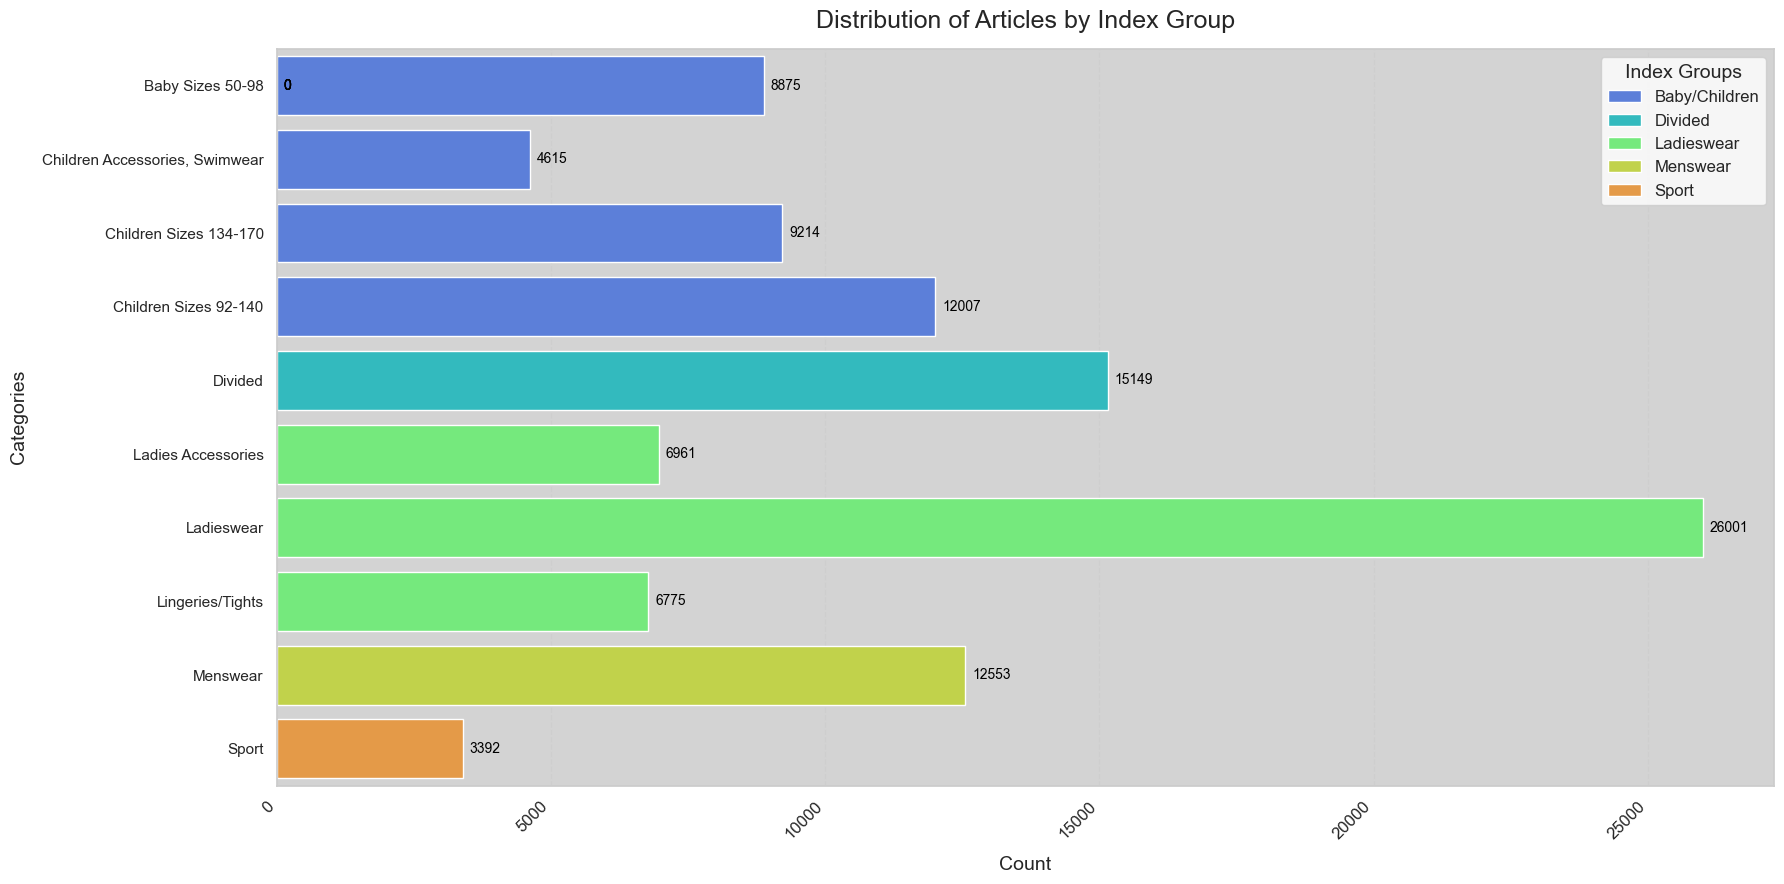

In [66]:
import seaborn as sns


grouped_data = articles.groupby(['index_group_name', 'index_name']).count()['article_id'].reset_index()

# Set Seaborn style and color palette
sns.set(style='whitegrid')
sns.set_palette("turbo")

# Create a grouped bar plot with Seaborn
plt.figure(figsize=(18, 9))
ax = sns.barplot(x='article_id', y='index_name', hue='index_group_name', data=grouped_data)

# Add value annotations on each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center', fontsize=10, color='black', xytext=(5, 0), textcoords='offset points')

# Customize labels and title
plt.xlabel('Count', fontsize=14, labelpad=10)
plt.ylabel('Categories', fontsize=14, labelpad=10)
plt.title('Distribution of Articles by Index Group', fontsize=18, pad=15)

# Add grid lines for better readability
plt.grid(True, axis='x', linestyle='--', alpha=0.7)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Increase legend font size
plt.legend(title='Index Groups', title_fontsize='14', fontsize='12', loc='upper right')

# Add a light background color to the plot area
ax.set_facecolor('lightgray')

# Adjust plot margins and spacing
plt.tight_layout()

# Show the plot
plt.show()

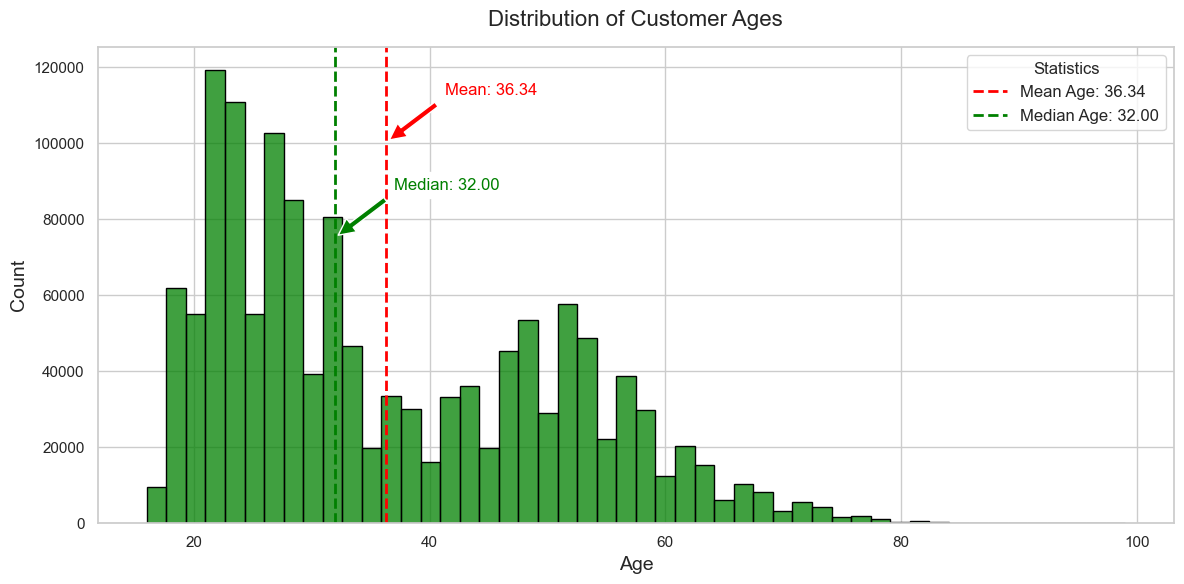

In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Set Seaborn style
sns.set(style="whitegrid", palette="turbo")

# Create a figure and axis
plt.figure(figsize=(12, 6))
ax = sns.histplot(data=customers, x='age', bins=50, color='green', edgecolor='black')

# Calculate mean and median
mean_age = customers['age'].mean()
median_age = customers['age'].median()

# Customize labels and title
ax.set_xlabel('Age', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.set_title('Distribution of Customer Ages', fontsize=16, pad=15)

# Add vertical lines for mean and median
ax.axvline(mean_age, color='red', linestyle='dashed', linewidth=2, label=f'Mean Age: {mean_age:.2f}')
ax.axvline(median_age, color='green', linestyle='dashed', linewidth=2, label=f'Median Age: {median_age:.2f}')

# Annotate mean and median
ax.annotate(f'Mean: {mean_age:.2f}', xy=(mean_age, ax.get_ylim()[1]*0.8), xytext=(mean_age+5, ax.get_ylim()[1]*0.9),
            arrowprops=dict(facecolor='red', shrink=0.05), fontsize=12, color='red', backgroundcolor='white')
ax.annotate(f'Median: {median_age:.2f}', xy=(median_age, ax.get_ylim()[1]*0.6), xytext=(median_age+5, ax.get_ylim()[1]*0.7),
            arrowprops=dict(facecolor='green', shrink=0.05), fontsize=12, color='green', backgroundcolor='white')

# Add legend
ax.legend(title='Statistics', fontsize=12)

# Adjust plot layout
plt.tight_layout()

# Show the plot
plt.show()

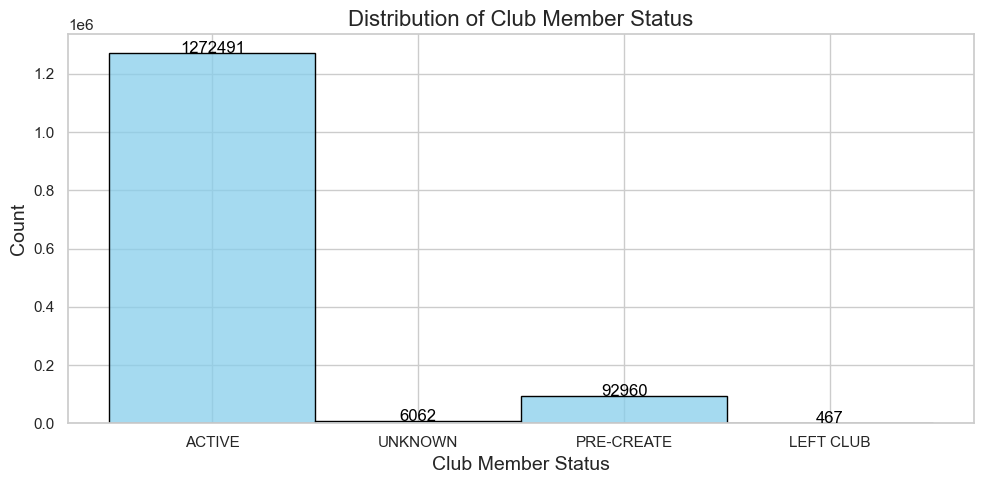

In [68]:
# Set Seaborn style and turbo palette
sns.set(style="whitegrid")
sns.set_palette("turbo")

# Create a figure and axis
plt.figure(figsize=(10, 5))
ax = sns.histplot(data=customers, x='club_member_status', color='skyblue', edgecolor='black', discrete=True)

# Customize labels and title
ax.set_xlabel('Club Member Status', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.set_title('Distribution of Club Member Status', fontsize=16)

# Add counts on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black')

# Show the plot
plt.tight_layout()
plt.show()

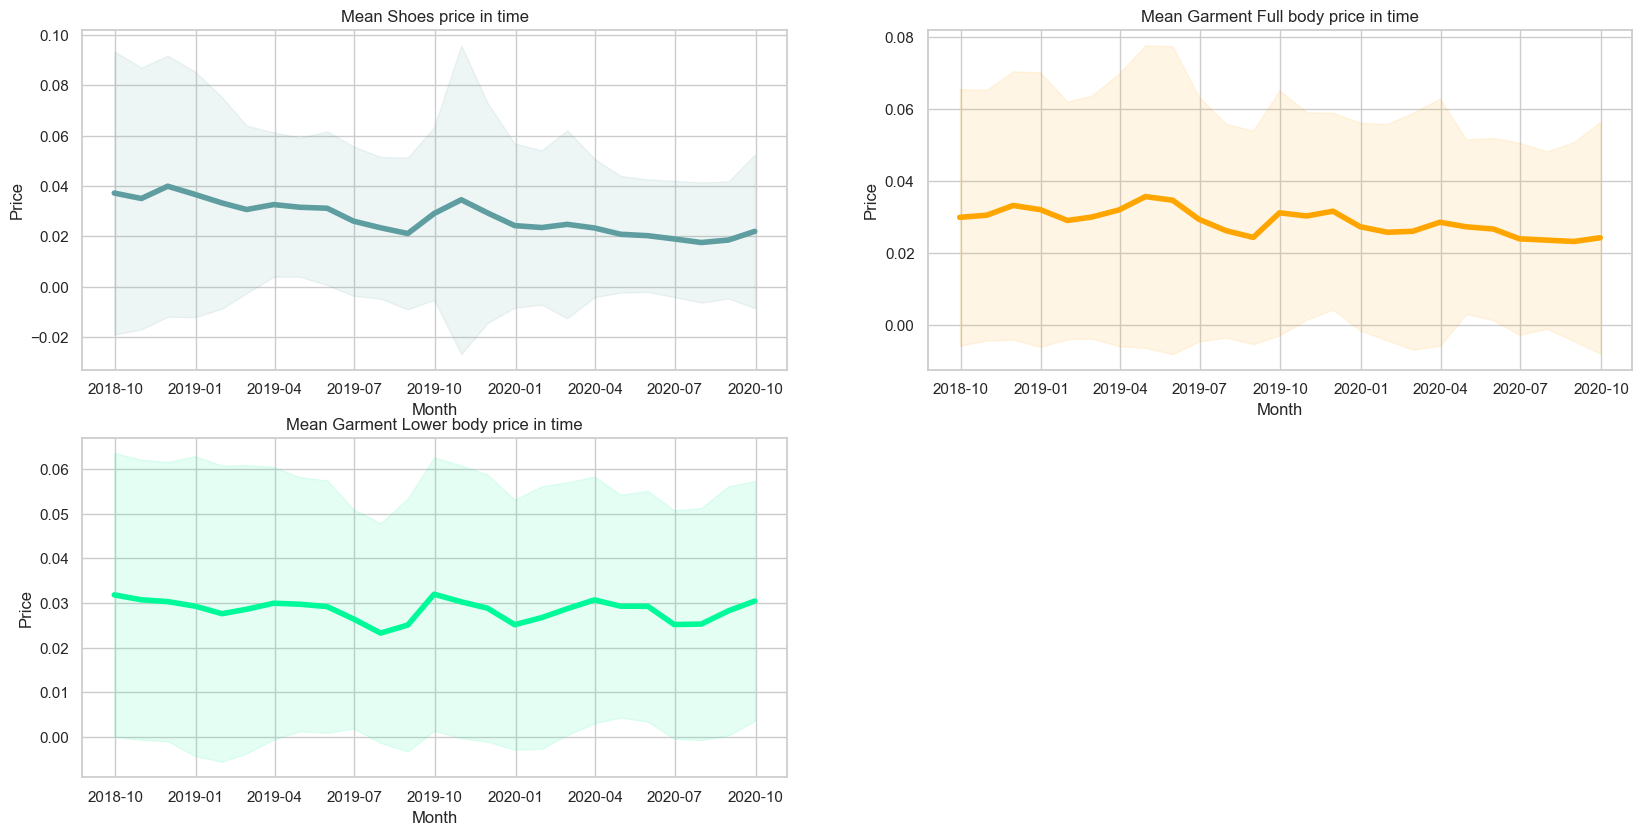

In [81]:
articles_for_merge = articles[['article_id', 'prod_name', 'product_type_name', 'product_group_name', 'index_name']]

articles_for_merge = transactions[['customer_id', 'article_id', 'price', 't_dat']].merge(articles_for_merge, on='article_id', how='left')

articles_for_merge['t_dat'] = pd.to_datetime(articles_for_merge['t_dat'])

product_list = ['Shoes', 'Garment Full body', 'Garment Lower body',]
colors = ['cadetblue', 'orange', 'mediumspringgreen', 'tomato', 'lightseagreen']
k = 0

f, ax = plt.subplots(3, 2, figsize=(20, 15))

for i in range(3):
    for j in range(2):
        try:
            product = product_list[k]
            articles_for_merge_product = articles_for_merge[articles_for_merge.product_group_name == product_list[k]]
            series_mean = articles_for_merge_product[['t_dat', 'price']].groupby(pd.Grouper(key="t_dat", freq='M')).mean().fillna(0)
            series_std = articles_for_merge_product[['t_dat', 'price']].groupby(pd.Grouper(key="t_dat", freq='M')).std().fillna(0)
            
            ax[i, j].plot(series_mean, linewidth=4, color=colors[k])
            ax[i, j].fill_between(series_mean.index, (series_mean.values-2*series_std.values).ravel(), 
                                   (series_mean.values+2*series_std.values).ravel(), color=colors[k], alpha=.1)
            
            ax[i, j].set_title(f'Mean {product_list[k]} price in time')
            ax[i, j].set_xlabel('Month')
            ax[i, j].set_ylabel('Price')  # Corrected y-label
            k += 1
        except IndexError:
            ax[i, j].set_visible(False)

plt.show()

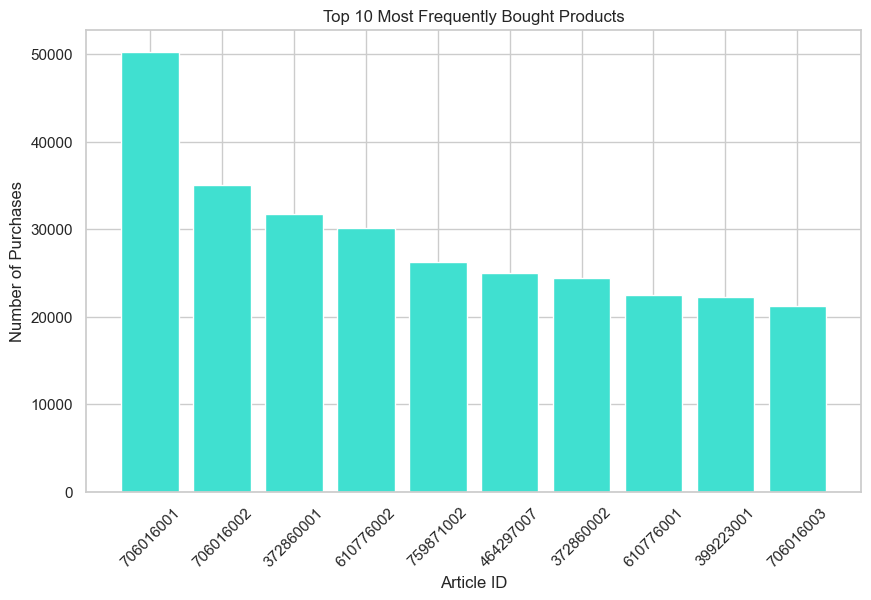

In [82]:
# Assuming 'transactions' is your DataFrame with 'article_id' as a column

# Count how often each article was bought and select the top 10
article_counts = transactions['article_id'].value_counts()
top_10_articles = article_counts.head(10)

# Convert the top 10 articles into a Pandas DataFrame for plotting
top_10_df = top_10_articles.reset_index()
top_10_df.columns = ['article_id', 'purchase_count']

# Plot the top 10 most frequently bought articles
plt.figure(figsize=(10, 6))
plt.bar(top_10_df['article_id'].astype(str), top_10_df['purchase_count'], color='turquoise')
plt.xlabel('Article ID')
plt.ylabel('Number of Purchases')
plt.title('Top 10 Most Frequently Bought Products')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

File not found: images\061\0610776002.jpg
File not found: images\061\0610776001.jpg


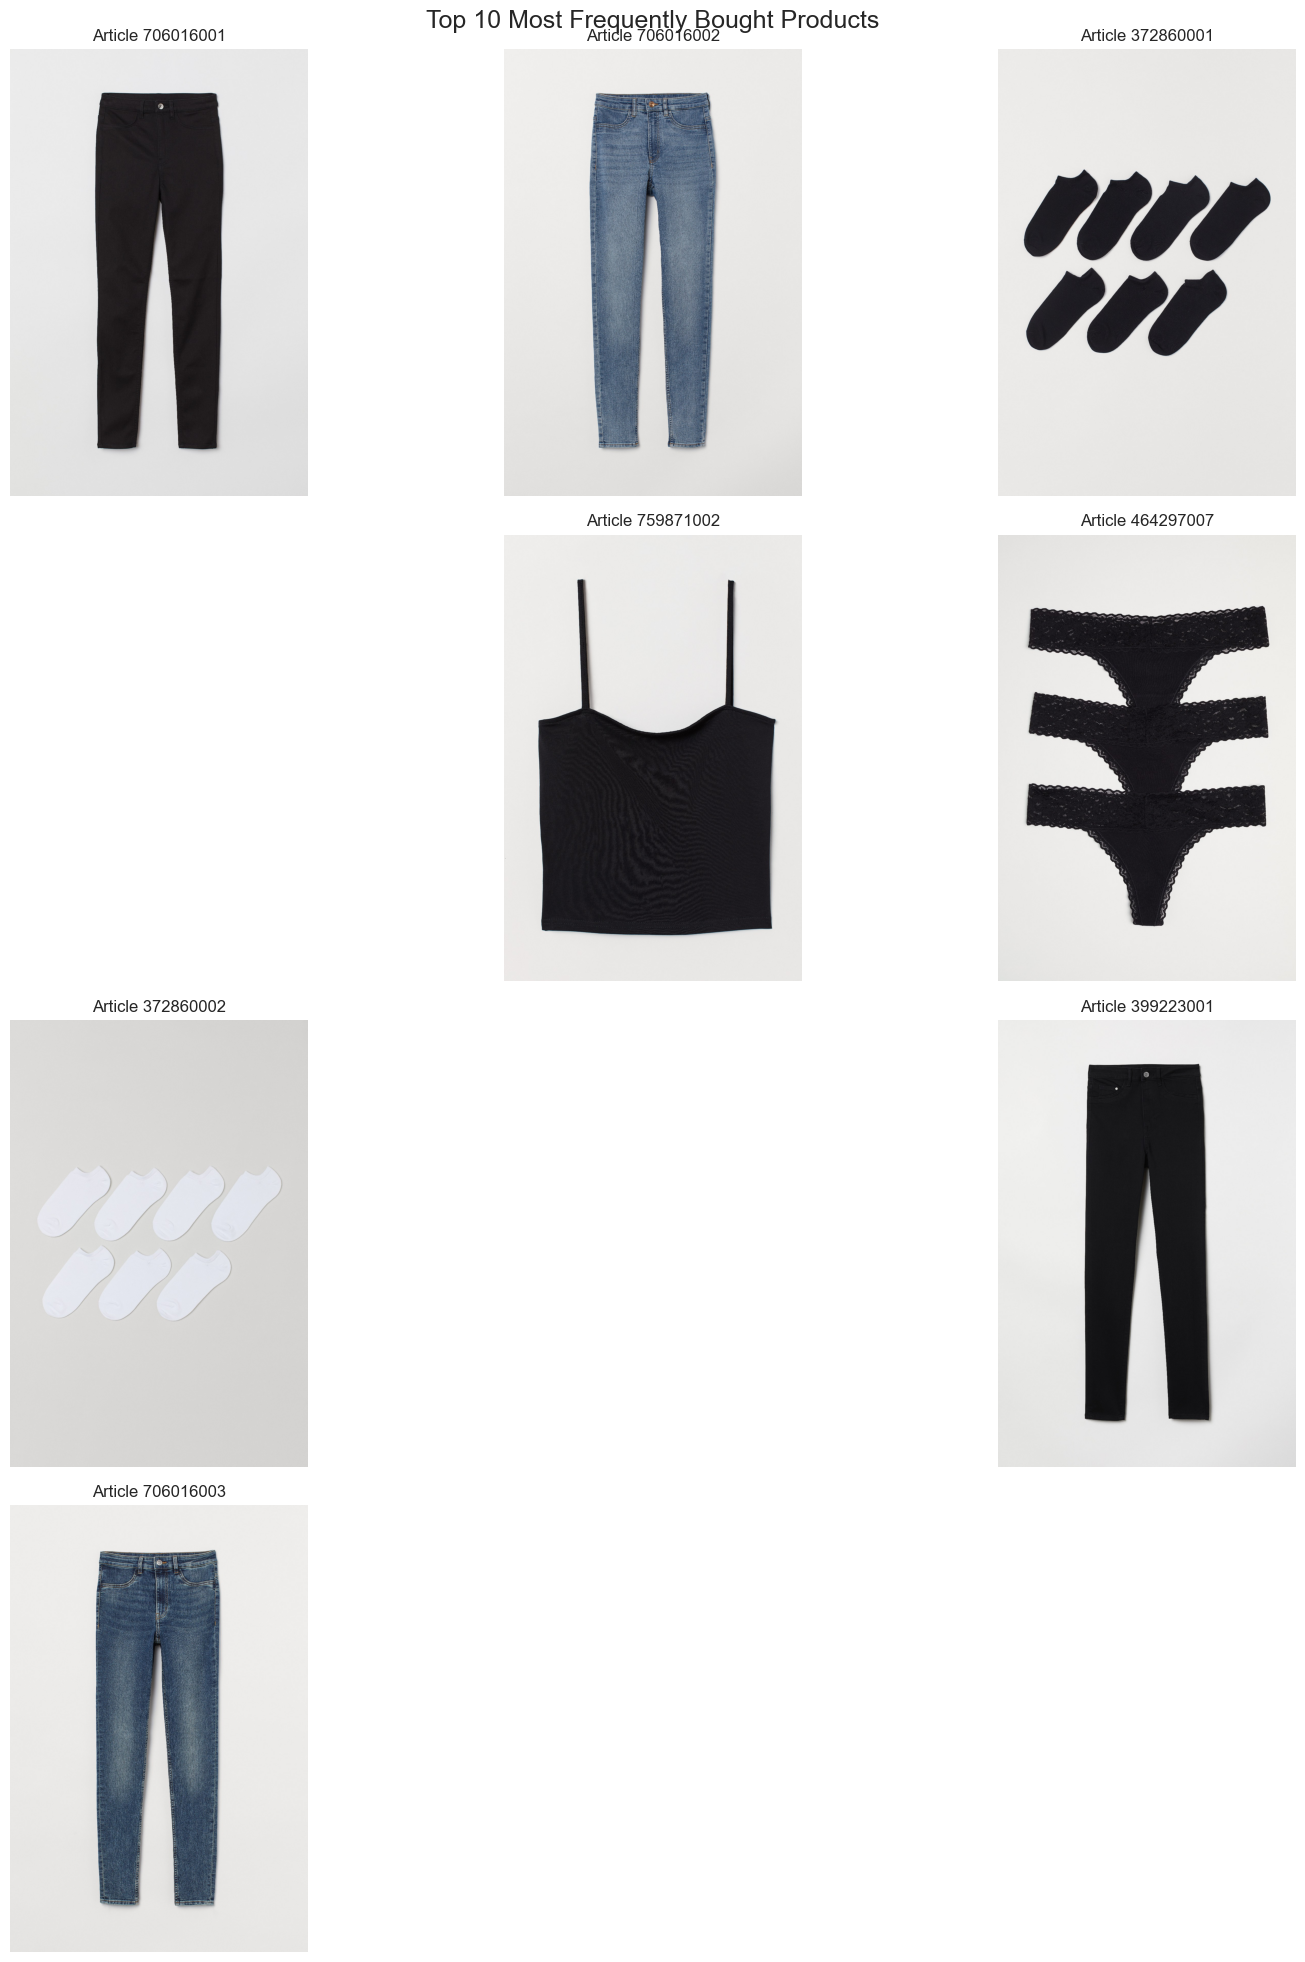

In [83]:
# Set base directory for images
BASE_DIR = "images"

# Get the top 10 most frequently bought articles
top_10_articles = article_counts.head(10).index

# Calculate the number of rows needed
num_rows = (len(top_10_articles) + 2) // 3  # Divide by 3 and round up to ensure full rows

# Prepare to display images
plt.figure(figsize=(15, num_rows * 5))
plt.suptitle('Top 10 Most Frequently Bought Products', size=18)

for i, item in enumerate(top_10_articles, start=1):
    image_path = os.path.join(BASE_DIR, f"0{str(item)[:2]}", f"0{item}.jpg")
    
    if os.path.exists(image_path):
        img = cv2.imread(image_path)[:, :, ::-1]  # Convert BGR to RGB
        plt.subplot(num_rows, 3, i)  # Create a grid with num_rows and 3 columns
        plt.title(f'Article {item}', size=12)
        plt.axis('off')
        plt.imshow(img)
    else:
        print(f"File not found: {image_path}")

plt.tight_layout()
plt.show()

# Image Existence Check

In [84]:
import os
# Load the articles data
articles = pd.read_csv("articles.csv")
articles = articles.head(25000)
# Function to check if image exists for an article
def image_exists(row):
    article_id = str(row['article_id']).zfill(5)
    path = os.path.join("images", f"0{article_id[:2]}", f"0{article_id}.jpg")
    return os.path.isfile(path)

# Create a new column 'image_exists' based on the function
articles['image_exists'] = articles.apply(image_exists, axis=1)

# Filter out articles with missing images
articles_with_images = articles[articles['image_exists'] == 1]

# Optionally, drop the 'image_exists' column if it's no longer needed
articles = articles.drop('image_exists', axis=1)

# Display the updated DataFrame
articles.head()

article_id  product_code          prod_name  product_type_no  \
0   108775015        108775          Strap top              253   
1   108775044        108775          Strap top              253   
2   108775051        108775      Strap top (1)              253   
3   110065001        110065  OP T-shirt (Idro)              306   
4   110065002        110065  OP T-shirt (Idro)              306   

  product_type_name  product_group_name  graphical_appearance_no  \
0          Vest top  Garment Upper body                  1010016   
1          Vest top  Garment Upper body                  1010016   
2          Vest top  Garment Upper body                  1010017   
3               Bra           Underwear                  1010016   
4               Bra           Underwear                  1010016   

  graphical_appearance_name  colour_group_code colour_group_name  ...  \
0                     Solid                  9             Black  ...   
1                     Solid                 10             White  ...   
2                    Stripe                 11         Off White  ...   
3                     Solid                  9             Black  ...   
4                     Solid                 10             White  ...   

   department_name index_code        index_name index_group_no  \
0     Jersey Basic          A        Ladieswear              1   
1     Jersey Basic          A        Ladieswear              1   
2     Jersey Basic          A        Ladieswear              1   
3   Clean Lingerie          B  Lingeries/Tights              1   
4   Clean Lingerie          B  Lingeries/Tights              1   

   index_group_name section_no            section_name garment_group_no  \
0        Ladieswear         16  Womens Everyday Basics             1002   
1        Ladieswear         16  Womens Everyday Basics             1002   
2        Ladieswear         16  Womens Everyday Basics             1002   
3        Ladieswear         61         Womens Lingerie             1017   
4        Ladieswear         61         Womens Lingerie             1017   

   garment_group_name                                        detail_desc  
0        Jersey Basic            Jersey top with narrow shoulder straps.  
1        Jersey Basic            Jersey top with narrow shoulder straps.  
2        Jersey Basic            Jersey top with narrow shoulder straps.  
3   Under-, Nightwear  Microfibre T-shirt bra with underwired, moulde...  
4   Under-, Nightwear  Microfibre T-shirt bra with underwired, moulde...  

[5 rows x 25 columns]

# TF-IDF and Cosine Similarity

In [85]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Define a TF-IDF Vectorizer Object. Remove all English stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)

# Replace NaN with an empty string
articles['detail_desc'] = articles['detail_desc'].fillna('')

# Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(articles['detail_desc'])

# Output the shape of tfidf_matrix
print(tfidf_matrix.shape)

# Array mapping from feature integer indices to feature name.
feature_names = tfidf.get_feature_names_out()
print(feature_names[100:110])

cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

(25000, 1908)
['17x34x36' '18' '180' '18m' '18x23' '18x24' '19' '19x30x39' '19x38x44'
 '19x42']


In [86]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

#  Recommendation Function

In [87]:
def get_recommendations(article_id, cosine_sim=cosine_sim, top_n=15):
    # Check if the article ID exists in the mapping
    if article_id not in indices:
        print(f"Article ID {article_id} not found.")
        return []

    # Get the index of the article that matches the ID
    idx = indices[article_id]

    # Get the pairwise similarity scores of all articles with that article
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the articles based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the top N most similar articles
    sim_scores = sim_scores[1:(top_n + 1)]

    # Get the articles indices
    article_indices = [i[0] for i in sim_scores]

    # Return the top N most similar articles
    return articles['article_id'].iloc[article_indices]


# Testing the Recommendation Function

In [88]:
recommendations = get_recommendations(118458003)
print(recommendations)


17       118458004
18       118458028
19       118458029
20       118458034
21       118458038
22       118458039
8296     522167001
11436    547780001
11437    547780002
11438    547780003
11439    547780004
11440    547780006
11441    547780007
11442    547780009
11443    547780012
Name: article_id, dtype: int64


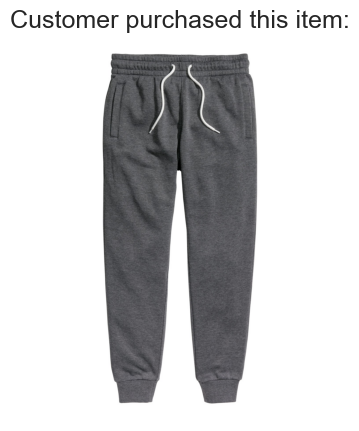

In [89]:
import os
import cv2
import matplotlib.pyplot as plt

BASE_DIR = "images"
item = 118458003  # Test a random item

# Format file path using os.path.join
image_path = os.path.join(BASE_DIR, f"0{str(item)[:2]}", f"0{item}.jpg")

# Check if the file exists
if os.path.exists(image_path):
    plt.figure(figsize=(20, 5))
    img = cv2.imread(image_path)[:, :, ::-1]
    plt.title('Customer purchased this item:', size=18)
    plt.axis('off')
    plt.imshow(img)
    plt.show()
else:
    print(f"File not found: {image_path}")

# Displaying Recommendations

In [90]:
# see results here
recommendations = get_recommendations(item)
print(recommendations)

17       118458004
18       118458028
19       118458029
20       118458034
21       118458038
22       118458039
8296     522167001
11436    547780001
11437    547780002
11438    547780003
11439    547780004
11440    547780006
11441    547780007
11442    547780009
11443    547780012
Name: article_id, dtype: int64


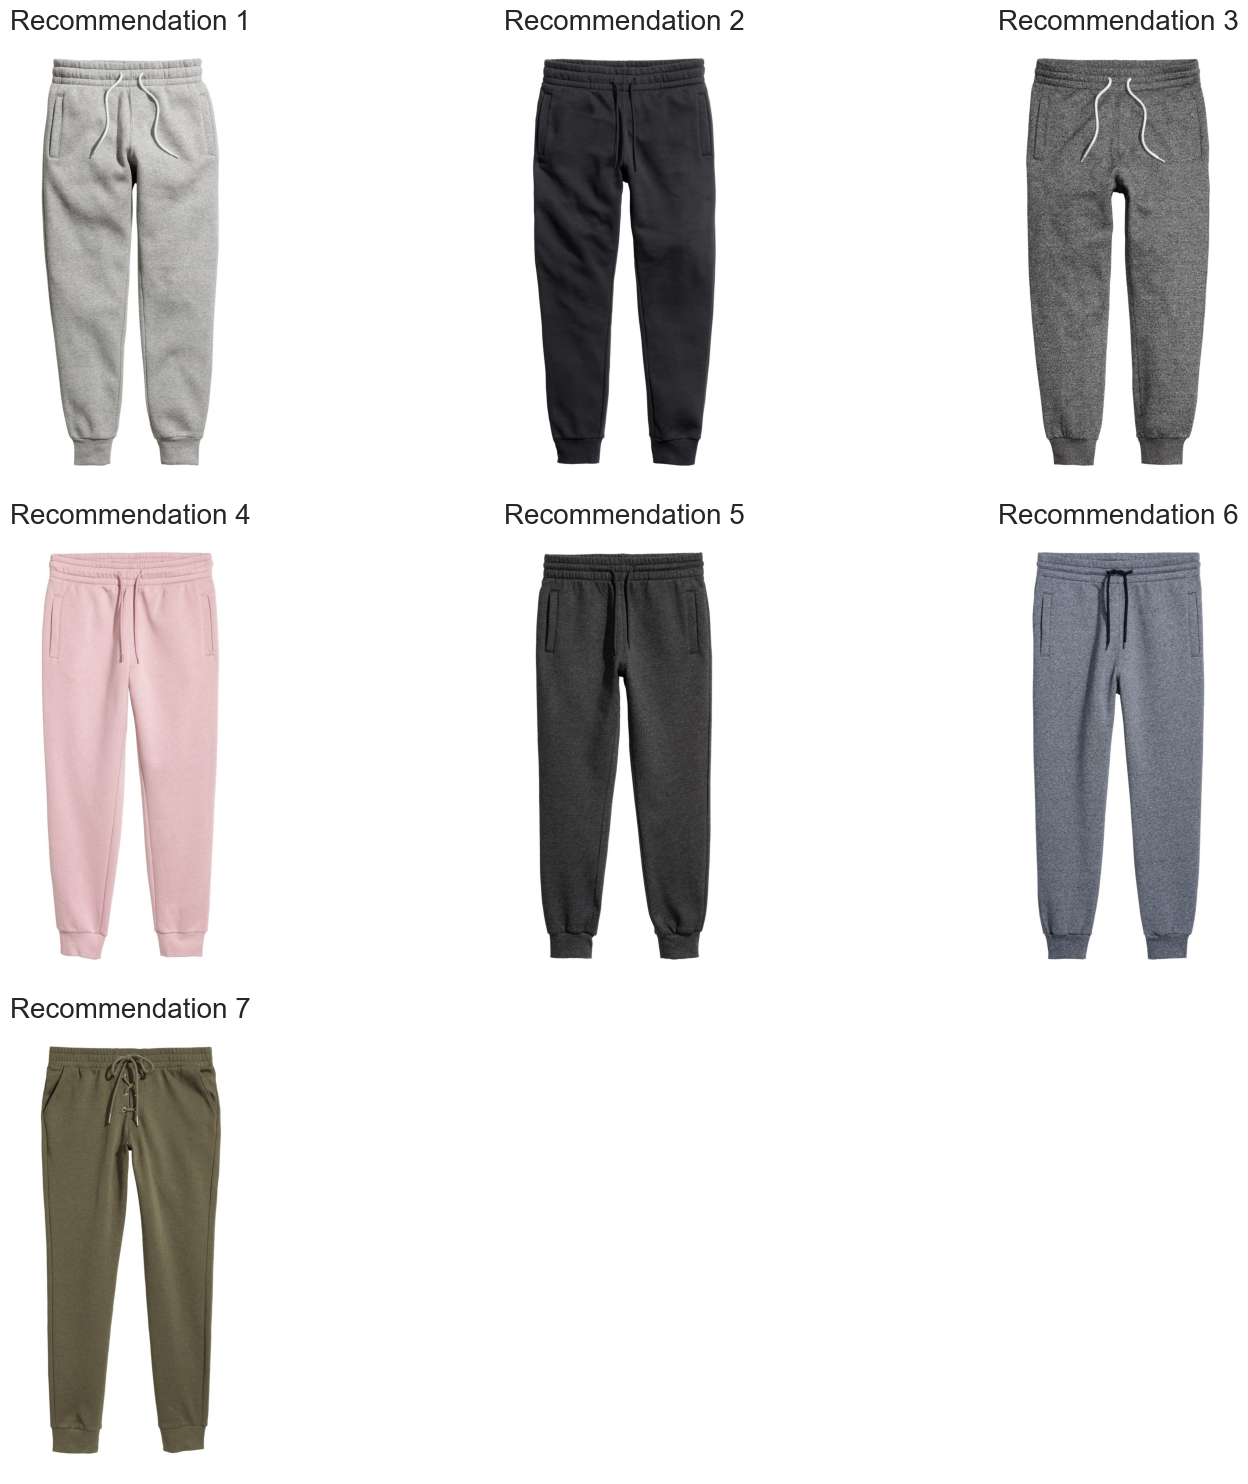

In [91]:
# Assuming BASE is the directory where images are stored
BASE = "images"

# Assuming recommendations is a DataFrame with item IDs
item_ids = recommendations.iloc[:7]

# Format file paths using os.path.join
file_paths = [os.path.join(BASE, f"0{str(item)[:2]}", f"0{item}.jpg") for item in item_ids]

# Calculate the number of rows needed
num_rows = (len(file_paths) + 2) // 3  

# Check and display images
plt.figure(figsize=(15, num_rows * 5))
for i, file_path in enumerate(file_paths, start=1):
    if os.path.exists(file_path):
        img = cv2.imread(file_path)[:, :, ::-1]
        plt.subplot(num_rows, 3, i) 
        plt.title(f'Recommendation {i}', size=20)
        plt.axis('off')
        plt.imshow(img)
    else:
        print(f"File not found: {file_path}")

plt.tight_layout()
plt.show()

# collaborative filtering model


In [17]:
import pandas as pd

# Load datasets
articles = pd.read_csv('articles.csv')
customers = pd.read_csv('customers.csv')
transactions = pd.read_csv('transactions_train.csv')
transactions = transactions.head(2000)

# data cleaning

In [18]:
# Fill missing values in articles dataset
articles['detail_desc'] = articles['detail_desc'].fillna('No description available')

# Fill missing values in customers dataset
customers['FN'] = customers['FN'].fillna(0)  # Assuming FN is a binary flag
customers['Active'] = customers['Active'].fillna(0)  # Assuming Active is a binary flag
customers['club_member_status'] = customers['club_member_status'].fillna('UNKNOWN')  # Fill NaNs with a placeholder
customers['fashion_news_frequency'] = customers['fashion_news_frequency'].fillna('UNKNOWN')  # Fill NaNs with a placeholder
customers['age'] = customers['age'].fillna(customers['age'].median())  # Fill NaNs with the median age

# Verify the handling of missing values
print("Articles missing values:\n", articles.isnull().sum())
print("Customers missing values:\n", customers.isnull().sum())


Articles missing values:
 article_id                      0
product_code                    0
prod_name                       0
product_type_no                 0
product_type_name               0
product_group_name              0
graphical_appearance_no         0
graphical_appearance_name       0
colour_group_code               0
colour_group_name               0
perceived_colour_value_id       0
perceived_colour_value_name     0
perceived_colour_master_id      0
perceived_colour_master_name    0
department_no                   0
department_name                 0
index_code                      0
index_name                      0
index_group_no                  0
index_group_name                0
section_no                      0
section_name                    0
garment_group_no                0
garment_group_name              0
detail_desc                     0
dtype: int64
Customers missing values:
 customer_id               0
FN                        0
Active                    0


In [19]:
transactions['bought'] = 1 #the interaction matrix will be binary
df=transactions[['customer_id', 'article_id', 'bought']]
df.head()

customer_id  article_id  bought
0  000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...   663713001       1
1  000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...   541518023       1
2  00007d2de826758b65a93dd24ce629ed66842531df6699...   505221004       1
3  00007d2de826758b65a93dd24ce629ed66842531df6699...   685687003       1
4  00007d2de826758b65a93dd24ce629ed66842531df6699...   685687004       1

In [20]:
df = df.drop_duplicates()

# Create Sparse Pivot Table

In [21]:
# Creating a sparse pivot table with customers in rows and items in columns
customer_items_matrix_df = df.pivot(index   = 'customer_id', 
                                    columns = 'article_id', 
                                    values  = 'bought').fillna(0)
customer_items_matrix_df.head(10)

article_id                                          108775015  110065001  \
customer_id                                                                
000058a12d5b43e67d225668fa1f8d618c13dc232df0cad...        0.0        0.0   
00007d2de826758b65a93dd24ce629ed66842531df66993...        0.0        0.0   
00083cda041544b2fbb0e0d2905ad17da7cf1007526fb4c...        0.0        0.0   
0008968c0d451dbc5a9968da03196fe20051965edde7413...        0.0        0.0   
000aa7f0dc06cd7174389e76c9e132a67860c5f65f97069...        0.0        0.0   
001127bffdda108579e6cb16080440e89bf1250a776c6e5...        0.0        0.0   
001ea4e9c54f7e9c88811260d954edc059d596147e1cf8a...        0.0        0.0   
001fd23db1109a94bba1319bb73df0b479059027c182da4...        0.0        0.0   
0021da829b898f82269fc51feded4eac2129058ee95bd75...        0.0        0.0   
00228762ecff5b8d1ea6a2e52b96dafa198febddbc3bf35...        0.0        0.0   

article_id                                          111593001  153115039  \
customer_id                                                                
000058a12d5b43e67d225668fa1f8d618c13dc232df0cad...        0.0        0.0   
00007d2de826758b65a93dd24ce629ed66842531df66993...        0.0        0.0   
00083cda041544b2fbb0e0d2905ad17da7cf1007526fb4c...        0.0        0.0   
0008968c0d451dbc5a9968da03196fe20051965edde7413...        0.0        0.0   
000aa7f0dc06cd7174389e76c9e132a67860c5f65f97069...        0.0        0.0   
001127bffdda108579e6cb16080440e89bf1250a776c6e5...        0.0        0.0   
001ea4e9c54f7e9c88811260d954edc059d596147e1cf8a...        0.0        0.0   
001fd23db1109a94bba1319bb73df0b479059027c182da4...        0.0        0.0   
0021da829b898f82269fc51feded4eac2129058ee95bd75...        0.0        0.0   
00228762ecff5b8d1ea6a2e52b96dafa198febddbc3bf35...        0.0        0.0   

article_id                                          156231001  156231002  \
customer_id                                                                
000058a12d5b43e67d225668fa1f8d618c13dc232df0cad...        0.0        0.0   
00007d2de826758b65a93dd24ce629ed66842531df66993...        0.0        0.0   
00083cda041544b2fbb0e0d2905ad17da7cf1007526fb4c...        0.0        0.0   
0008968c0d451dbc5a9968da03196fe20051965edde7413...        0.0        0.0   
000aa7f0dc06cd7174389e76c9e132a67860c5f65f97069...        0.0        0.0   
001127bffdda108579e6cb16080440e89bf1250a776c6e5...        0.0        0.0   
001ea4e9c54f7e9c88811260d954edc059d596147e1cf8a...        0.0        0.0   
001fd23db1109a94bba1319bb73df0b479059027c182da4...        0.0        0.0   
0021da829b898f82269fc51feded4eac2129058ee95bd75...        0.0        0.0   
00228762ecff5b8d1ea6a2e52b96dafa198febddbc3bf35...        0.0        0.0   

article_id                                          160442007  176550020  \
customer_id                                                                
000058a12d5b43e67d225668fa1f8d618c13dc232df0cad...        0.0        0.0   
00007d2de826758b65a93dd24ce629ed66842531df66993...        0.0        0.0   
00083cda041544b2fbb0e0d2905ad17da7cf1007526fb4c...        0.0        0.0   
0008968c0d451dbc5a9968da03196fe20051965edde7413...        0.0        0.0   
000aa7f0dc06cd7174389e76c9e132a67860c5f65f97069...        0.0        0.0   
001127bffdda108579e6cb16080440e89bf1250a776c6e5...        0.0        0.0   
001ea4e9c54f7e9c88811260d954edc059d596147e1cf8a...        0.0        0.0   
001fd23db1109a94bba1319bb73df0b479059027c182da4...        0.0        0.0   
0021da829b898f82269fc51feded4eac2129058ee95bd75...        0.0        0.0   
00228762ecff5b8d1ea6a2e52b96dafa198febddbc3bf35...        0.0        0.0   

article_id                                          179208001  179950001  ...  \
customer_id                                                               ...   
000058a12d5b43e67d225668fa1f8d618c13dc232df0cad...        0.0        0.0  ...   
00007d2de826758b65a93dd24ce629ed66842531df66993...        0.0        0.0  ...   
00083cda041544b2fbb0e0d2

# Train-Test Split

In [22]:
from sklearn.model_selection import train_test_split

customer_items_matrix_df_train, customer_items_matrix_df_test = train_test_split(customer_items_matrix_df,test_size=0.33, random_state=42)
print(customer_items_matrix_df_train.shape, customer_items_matrix_df_test.shape)

(401, 1496) (198, 1496)


#  Calculate Matrix Sparsity

In [23]:
# Calculate matrix sparsity

how_sparse = customer_items_matrix_df_train.values.mean()*100

print("We have only", how_sparse, "percent of the values filled in the sparse matrix.")

We have only 0.20520223505407606 percent of the values filled in the sparse matrix.


# Define Autoencoder Model

In [25]:
from keras.layers import Input, Dense, Dropout
from keras.models import Model


def autoEncoder(X):
    '''
    Autoencoder for Collaborative Filter Model
    '''

    # Input
    input_layer = Input(shape=(X.shape[1],), name='UserScore')
    
    # Encoder
    enc = Dense(512, activation='selu', name='EncLayer1')(input_layer)

    # Latent Space
    lat_space = Dense(256, activation='selu', name='LatentSpace')(enc)
    lat_space = Dropout(0.8, name='Dropout')(lat_space) # Dropout

    # Decoder
    dec = Dense(512, activation='selu', name='DecLayer1')(lat_space)

    # Output
    output_layer = Dense(X.shape[1], activation='linear', name='UserScorePred')(dec)

    # this model maps an input to its reconstruction
    model = Model(input_layer, output_layer)    
    
    return model

# Compile the Model


In [29]:
from tensorflow.keras.optimizers import Adam

# Correctly initialize the optimizer
optimizer = Adam(learning_rate=0.0001)

# Compile the model with the corrected optimizer
model.compile(optimizer=optimizer, loss='mse')

# Summarize the model
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ UserScore (InputLayer)          │ (None, 1496)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ EncLayer1 (Dense)               │ (None, 512)            │       766,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ LatentSpace (Dense)             │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ DecLayer1 (Dense)               │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ UserScorePred (Dense)           │ (None, 1496)           │       767,448 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,796,824 (6.85 MB)

 Trainable params: 1,796,824 (6.85 MB)

 Non-trainable params: 0 (0.00 B)

# . Train the Model

In [30]:
hist = model.fit(x=X, y=X,
                  epochs=50,# Using 50 here instead of 10 or 20 improved the performance very much!
                  batch_size=64,
                  shuffle=True,
                  validation_split=0.1)

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0426 - val_loss: 0.0118
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0397 - val_loss: 0.0112
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0359 - val_loss: 0.0107
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0334 - val_loss: 0.0103
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0319 - val_loss: 0.0099
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0290 - val_loss: 0.0096
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0285 - val_loss: 0.0092
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0274 - val_loss: 0.0090
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0259 - val_loss: 0.0087
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0237 - val_loss: 0.0085
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0227 - val_loss: 0.0082
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0211 - val_loss: 0.0080
E

# Model evaluation

In [98]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
# Evaluate the model on test data
evaluation = model.evaluate(X_test, X_test)
print(f"Test MSE: {evaluation:.4f}")

# Plot the training and validation loss
def plot_hist_and_evaluate(hist, model, X_train, X_test):
    

    # Predict on the test set
    X_test_pred = model.predict(X_test)

    # Calculate evaluation metrics
    mse_test = mean_squared_error(X_test.flatten(), X_test_pred.flatten())
    mae_test = mean_absolute_error(X_test.flatten(), X_test_pred.flatten())
    rmse_test = np.sqrt(mse_test)
    
    # Print evaluation metrics
    print(f"Final Training Loss: {hist.history['loss'][-1]:.4f}")
    print(f"Final Validation Loss: {hist.history['val_loss'][-1]:.4f}")
    print(f"Test Mean Squared Error (MSE): {mse_test:.4f}")
    print(f"Test Mean Absolute Error (MAE): {mae_test:.4f}")
    print(f"Test Root Mean Squared Error (RMSE): {rmse_test:.4f}")

# Plot history and evaluate the model
plot_hist_and_evaluate(hist, model, X, X_test)



7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0041  
Test MSE: 0.0040
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Final Training Loss: 0.0061
Final Validation Loss: 0.0046
Test Mean Squared Error (MSE): 0.0040
Test Mean Absolute Error (MAE): 0.0358
Test Root Mean Squared Error (RMSE): 0.0636


# Plot Training and Validation Loss

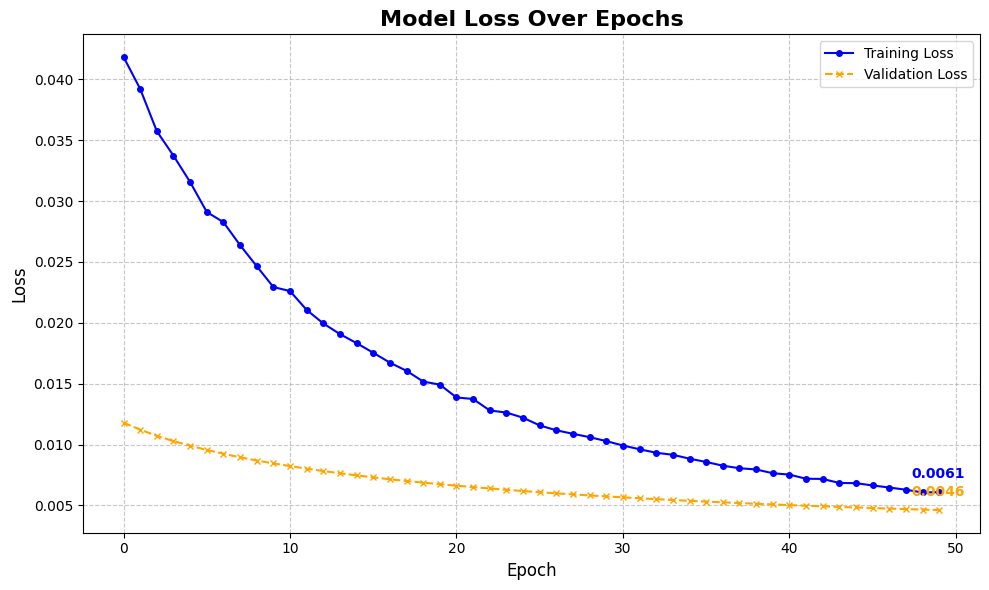

In [99]:
import matplotlib.pyplot as plt
def plot_hist(hist):
    # Create figure & axis
    fig, ax = plt.subplots(figsize=(10, 6))  # Set figure size for better readability

    # Plot training loss
    ax.plot(hist.history['loss'], label='Training Loss', color='blue', linestyle='-', marker='o', markersize=4)

    # Plot validation loss
    ax.plot(hist.history['val_loss'], label='Validation Loss', color='orange', linestyle='--', marker='x', markersize=4)

    # Set plot title and labels
    plt.title('Model Loss Over Epochs', fontsize=16, fontweight='bold')
    plt.xlabel('Epoch', fontsize=12)
    plt.ylabel('Loss', fontsize=12)

    # Annotate the final loss values
    final_train_loss = hist.history['loss'][-1]
    final_val_loss = hist.history['val_loss'][-1]
    ax.annotate(f'{final_train_loss:.4f}', xy=(len(hist.history['loss']) - 1, final_train_loss),
                xytext=(-20, 10), textcoords='offset points', fontsize=10, color='blue', fontweight='bold')
    ax.annotate(f'{final_val_loss:.4f}', xy=(len(hist.history['val_loss']) - 1, final_val_loss),
                xytext=(-20, 10), textcoords='offset points', fontsize=10, color='orange', fontweight='bold')

    # Add grid lines
    plt.grid(True, linestyle='--', alpha=0.7)

    # Add legend
    plt.legend(loc='upper right', fontsize=10)

    # Improve layout
    plt.tight_layout()

    # Show the plot
    plt.show()

# Assuming 'hist' is the history object from model.fit
plot_hist(hist)

# Predict New Interactions

In [94]:
# Predict new Matrix Interactions, set score zero on articles customer haven't purchased
new_matrix = model.predict(X) * (X[0] == 0)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


# Convert to DataFrame

In [45]:
# converting the reconstructed matrix back to a Pandas dataframe
new_customer_items_matrix_df  = pd.DataFrame(new_matrix, 
                                            columns = customer_items_matrix_df_train.columns, 
                                            index   = customer_items_matrix_df_train.index)
new_customer_items_matrix_df.head()

article_id                                          108775015  110065001  \
customer_id                                                                
08ef984221fd7b8d9d903c991eec3cda5a3af7a82882c82...  -0.013293  -0.013152   
029ceb992cb63df03c109790046e3fdebfce0b63c968823...   0.016670  -0.017628   
02334389c86031bc841c43b000006162d3bdadd0a88acd6...   0.082120   0.005176   
07a420b50098f077205a5d56780dd0d946034362b00198f...   0.006014   0.009149   
082fa45b5ed4935d58b92bc9044e5a249772a740d9d2cca...   0.007755  -0.020678   

article_id                                          111593001  153115039  \
customer_id                                                                
08ef984221fd7b8d9d903c991eec3cda5a3af7a82882c82...   0.039318  -0.012482   
029ceb992cb63df03c109790046e3fdebfce0b63c968823...   0.043902   0.007670   
02334389c86031bc841c43b000006162d3bdadd0a88acd6...   0.017939  -0.008416   
07a420b50098f077205a5d56780dd0d946034362b00198f...  -0.018970  -0.042362   
082fa45b5ed4935d58b92bc9044e5a249772a740d9d2cca...   0.032462  -0.002306   

article_id                                          156231001  156231002  \
customer_id                                                                
08ef984221fd7b8d9d903c991eec3cda5a3af7a82882c82...   0.018690   0.022673   
029ceb992cb63df03c109790046e3fdebfce0b63c968823...   0.079218  -0.008489   
02334389c86031bc841c43b000006162d3bdadd0a88acd6...   0.015459  -0.009763   
07a420b50098f077205a5d56780dd0d946034362b00198f...  -0.020277   0.019586   
082fa45b5ed4935d58b92bc9044e5a249772a740d9d2cca...   0.028928   0.006609   

article_id                                          160442007  176550020  \
customer_id                                                                
08ef984221fd7b8d9d903c991eec3cda5a3af7a82882c82...   0.000399   0.002352   
029ceb992cb63df03c109790046e3fdebfce0b63c968823...   0.036135   0.003547   
02334389c86031bc841c43b000006162d3bdadd0a88acd6...   0.038890  -0.012411   
07a420b50098f077205a5d56780dd0d946034362b00198f...  -0.011521  -0.002463   
082fa45b5ed4935d58b92bc9044e5a249772a740d9d2cca...   0.007609   0.007854   

article_id                                          179208001  179950001  ...  \
customer_id                                                               ...   
08ef984221fd7b8d9d903c991eec3cda5a3af7a82882c82...   0.051468   0.007533  ...   
029ceb992cb63df03c109790046e3fdebfce0b63c968823...   0.014193   0.005390  ...   
02334389c86031bc841c43b000006162d3bdadd0a88acd6...  -0.001311  -0.003044  ...   
07a420b50098f077205a5d56780dd0d946034362b00198f...   0.003012  -0.010423  ...   
082fa45b5ed4935d58b92bc9044e5a249772a740d9d2cca...  -0.035155  -0.003869  ...   

article_id                                          713997001  714373001  \
customer_id                                                                
08ef984221fd7b8d9d903c991eec3cda5a3af7a82882c82...  -0.030111   0.019120   
029ceb992cb63df03c109790046e3fdebfce0b63c968823...   0.008523   0.020949   
02334389c86031bc841c43b000006162d3bdadd0a88acd6...  -0.033847  -0.003654   
07a420b50098f077205a5d56780dd0d946034362b00198f...  -0.078538   0.012935   
082fa45b5ed4935d58b92bc9044e5a249772a740d9d2cca...   0.015610  -0.008358   

article_id                                          714417001  714425001  \
customer_id                                                                
08ef984221fd7b8d9d903c991eec3cda5a3af7a82882c82...   0.005209   0.050520   
029ceb992cb63df03c109790046e3fdebfce0b63c968823...  -0.032722  -0.011222   
02334389c86031bc841c43b000006162d3bdadd0a88acd6...  -0.058226  -0.002575   
07a420b50098f077205a5d56780dd0d946034362b00198f...  -0.028962  -0.016487   
082fa45b5ed4935d58b92bc9044e5a249772a740d9d2cca...   0.061613  -0.008950   

article_id                                          716519001  719017002  \
customer_id                                                                
08ef984221fd7b8d9d903c991eec3cda5a3af7a82882c82...   0.018848   0.002243   
029ceb

# Display Min and Max Values

In [46]:
print(new_customer_items_matrix_df.values.min(), new_customer_items_matrix_df.values.max())


-0.3928645 0.35562795


# Define Recommender Function

In [60]:
def recommender_for_customer(customer_id, interact_matrix, df_content, topn = 10):
    '''
    Recommender Articles for Customers
    '''
    pred_scores = interact_matrix.loc[customer_id].values

    df_scores   = pd.DataFrame({'article_id': list(customer_items_matrix_df.columns), 
                               'score': pred_scores})

    df_rec      = df_scores.set_index('article_id')\
                    .join(df_content.set_index('article_id'))\
                    .sort_values('score', ascending=False)\
                    .head(topn)[['score', 'prod_name']]
    
    return df_rec[df_rec.score > 0]

# Visualize Previously Purchased Articles

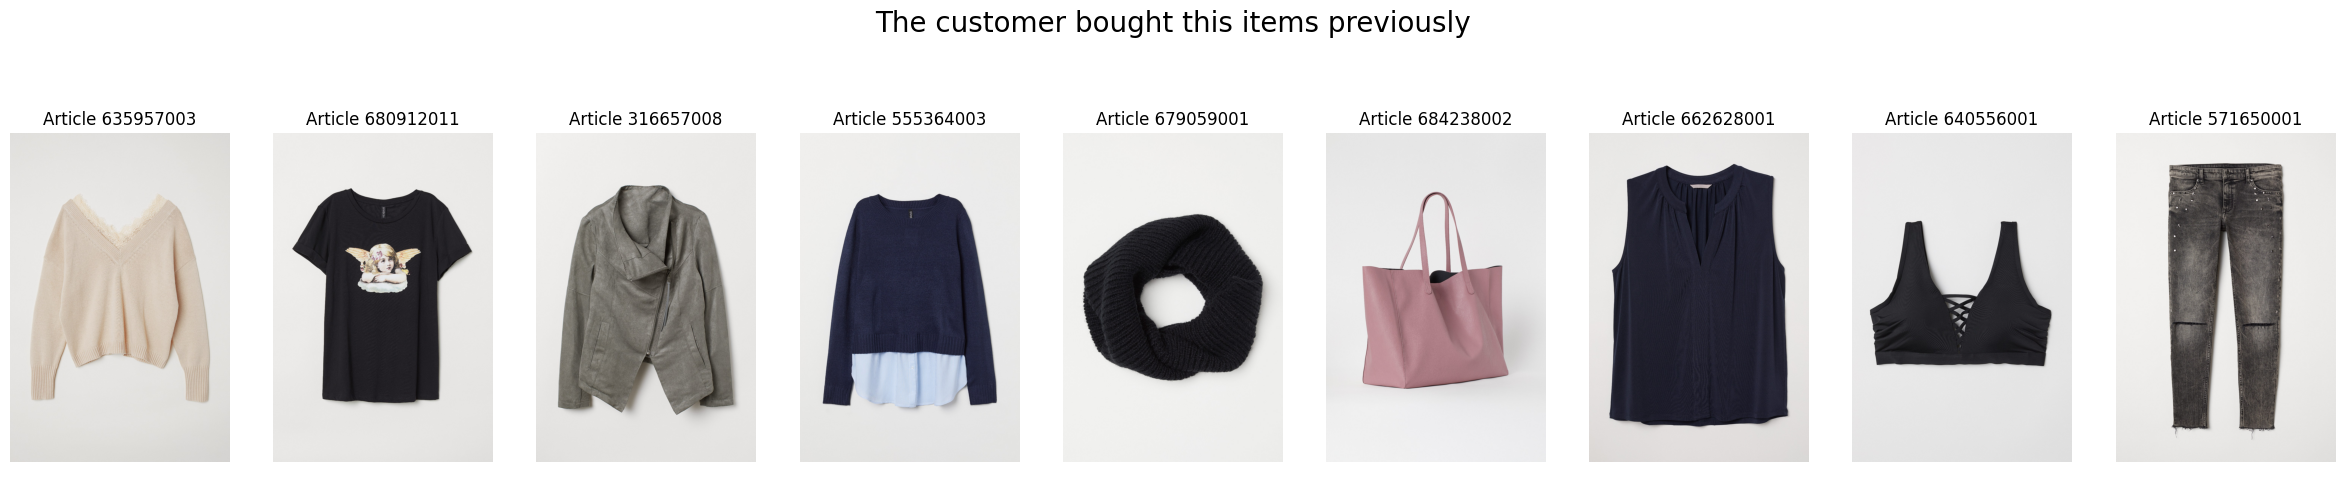

In [100]:

hist_customer=recommender_for_customer(customer_id     = '02e0910945216963833093e0e56712e7362b01b7ef0cd4b375f857542b085020', 
                         interact_matrix = customer_items_matrix_df, 
                         df_content      = articles)


prev_items = hist_customer.index.values
k=len(prev_items)
fig = plt.figure(figsize=(30, 5))

plt.title('The customer bought this items previously\n\n',size=20)
plt.axis('off')

for item, i in zip(prev_items, range(1, k+1)):
    article_id = str(item)
    path = "images/0" + str(article_id[:2]) + "/0" +article_id + ".jpg"
    image = plt.imread(path)
    fig.add_subplot(1, k, i)
    plt.title('Article %i'%item,size=12)
    plt.axis('off') 
    plt.imshow(image)

In [88]:
# Debugging print statement to check path construction
print(f"Generated path: {path} for Article ID {article_id}")


Generated path: D:/DeepLearning/H&M/images_128_128/068/0685343001.jpg for Article ID 685343001


In [89]:
#EXAMPLE: SEE THE LIST OF ARTICLES previously purchased by the customer
hist_customer

score                  prod_name
article_id                                  
635957003     1.0  CSP Coronado lace sweater
680912011     1.0                  Linni tee
316657008     1.0            Karenina Jacket
555364003     1.0      Spencer Shirt Sweater
679059001     1.0         GABBY KNITTED TUBE
684238002     1.0       Savannah shopper (1)
662628001     1.0              MC Eleven top
640556001     1.0               Bali top BIG
571650001     1.0         Taylor Fancy Denim

# Visualize Newly Recommended Articles

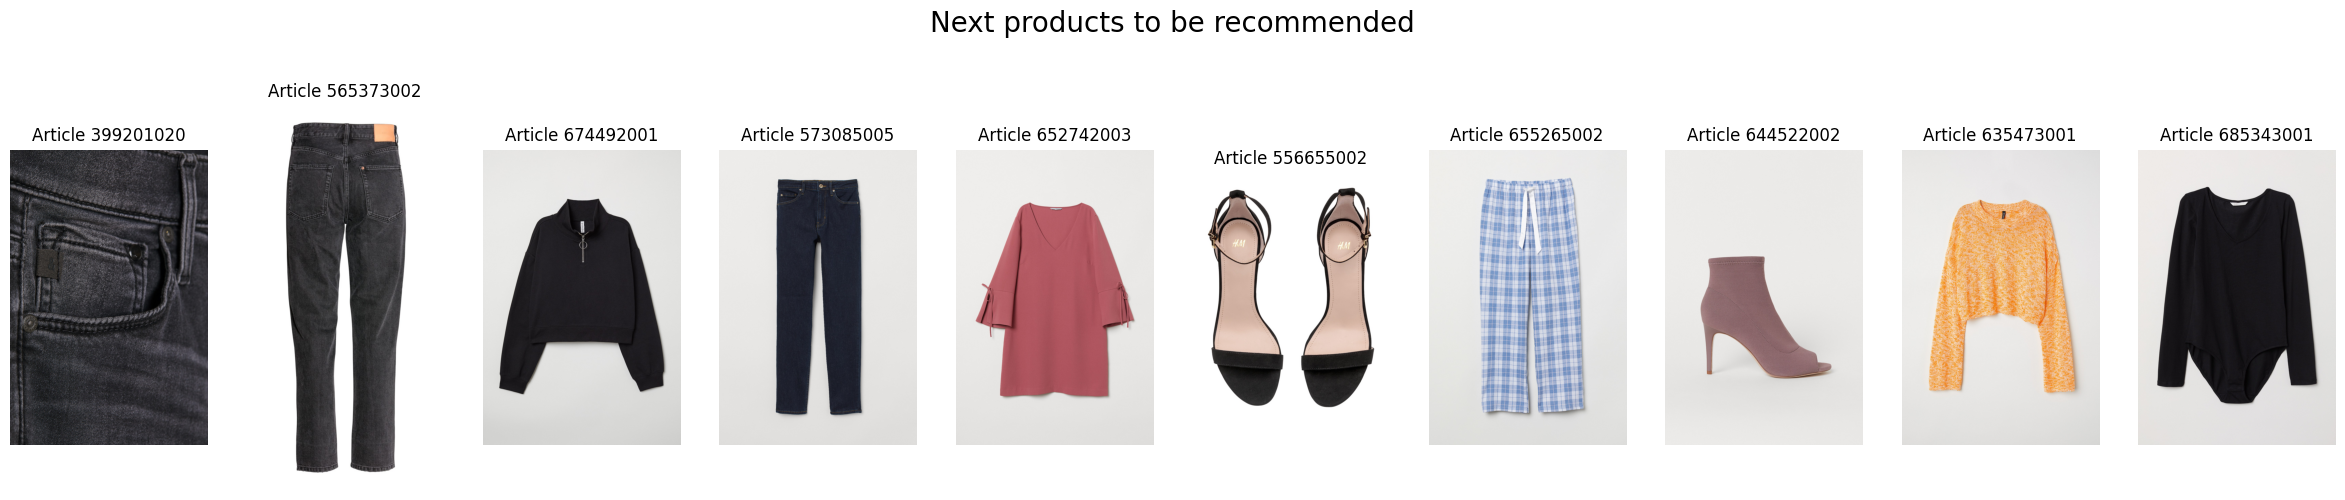

In [101]:
#EXAMPLE: Recommended Articles (SORTED BY BEST SCORED)
hist_customer_rec=recommender_for_customer(customer_id     = '02e0910945216963833093e0e56712e7362b01b7ef0cd4b375f857542b085020', 
                         interact_matrix = new_customer_items_matrix_df, 
                         df_content      = articles)

next_items = hist_customer_rec.index.values
k=len(next_items)
fig = plt.figure(figsize=(30, 5))

plt.title('Next products to be recommended\n\n',size=20)
plt.axis('off')

for item, i in zip(next_items, range(1, k+1)):
    try:
        article_id = str(item)
        path = "images/0" + str(article_id[:2]) + "/0" +article_id + ".jpg"
        image = plt.imread(path)
        fig.add_subplot(1, k, i)    
        plt.title('Article %i'%item,size=12)
        plt.axis('off') 
        plt.imshow(image)
    except: 
        pass

# Mapping Input to Itself with Autoencoders

In [64]:
# We want to map the input to itself (that is what auto-encoders do, apparently)
X_test = customer_items_matrix_df_test.values

# #  Generating New Predictions for Test Set

In [65]:
new_matrix_test = model.predict(X_test) * (X_test[0] == 0)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


#  Creating a DataFrame for New Predictions

In [66]:
new_customer_items_matrix_df_test  = pd.DataFrame(new_matrix_test, 
                                            columns = customer_items_matrix_df_test.columns, 
                                            index   = customer_items_matrix_df_test.index)
new_customer_items_matrix_df_test.head()

article_id                                          108775015  110065001  \
customer_id                                                                
01f597f5eba83f9709eceb5a70a99f3a4009a6e827bf729...   0.071025  -0.047253   
077641946a092614f6da9c0ab14ce034907c4e168bd73ae...  -0.188960  -0.265364   
0a3d969f9d990f20c038ad8a1b3e4a172e862717f3c992b...  -0.024659  -0.027662   
015e83393e4fc3b071ba6fc5f174bf3bf9813c88dcaf3e6...  -0.000689   0.004657   
03176a1445de4730c2ca5d514c3ce2182972ad42dfae65f...   0.084414  -0.027989   

article_id                                          111593001  153115039  \
customer_id                                                                
01f597f5eba83f9709eceb5a70a99f3a4009a6e827bf729...   0.016762  -0.078916   
077641946a092614f6da9c0ab14ce034907c4e168bd73ae...   0.026288  -0.092316   
0a3d969f9d990f20c038ad8a1b3e4a172e862717f3c992b...  -0.014959  -0.040744   
015e83393e4fc3b071ba6fc5f174bf3bf9813c88dcaf3e6...   0.007366   0.025935   
03176a1445de4730c2ca5d514c3ce2182972ad42dfae65f...   0.000298   0.123389   

article_id                                          156231001  156231002  \
customer_id                                                                
01f597f5eba83f9709eceb5a70a99f3a4009a6e827bf729...   0.011464   0.037966   
077641946a092614f6da9c0ab14ce034907c4e168bd73ae...  -0.175620  -0.068953   
0a3d969f9d990f20c038ad8a1b3e4a172e862717f3c992b...   0.044620   0.035126   
015e83393e4fc3b071ba6fc5f174bf3bf9813c88dcaf3e6...  -0.008981   0.007747   
03176a1445de4730c2ca5d514c3ce2182972ad42dfae65f...   0.114043   0.079202   

article_id                                          160442007  176550020  \
customer_id                                                                
01f597f5eba83f9709eceb5a70a99f3a4009a6e827bf729...  -0.039838   0.090179   
077641946a092614f6da9c0ab14ce034907c4e168bd73ae...   0.011801   0.056190   
0a3d969f9d990f20c038ad8a1b3e4a172e862717f3c992b...   0.023831  -0.043566   
015e83393e4fc3b071ba6fc5f174bf3bf9813c88dcaf3e6...   0.018484  -0.032003   
03176a1445de4730c2ca5d514c3ce2182972ad42dfae65f...  -0.024735   0.019558   

article_id                                          179208001  179950001  ...  \
customer_id                                                               ...   
01f597f5eba83f9709eceb5a70a99f3a4009a6e827bf729...   0.016402  -0.013231  ...   
077641946a092614f6da9c0ab14ce034907c4e168bd73ae...  -0.011215  -0.050318  ...   
0a3d969f9d990f20c038ad8a1b3e4a172e862717f3c992b...  -0.002093  -0.034615  ...   
015e83393e4fc3b071ba6fc5f174bf3bf9813c88dcaf3e6...  -0.002495  -0.007205  ...   
03176a1445de4730c2ca5d514c3ce2182972ad42dfae65f...  -0.102865  -0.088611  ...   

article_id                                          713997001  714373001  \
customer_id                                                                
01f597f5eba83f9709eceb5a70a99f3a4009a6e827bf729...   0.059944  -0.096661   
077641946a092614f6da9c0ab14ce034907c4e168bd73ae...  -0.028632   0.048725   
0a3d969f9d990f20c038ad8a1b3e4a172e862717f3c992b...  -0.002950  -0.022177   
015e83393e4fc3b071ba6fc5f174bf3bf9813c88dcaf3e6...  -0.069376   0.019894   
03176a1445de4730c2ca5d514c3ce2182972ad42dfae65f...  -0.113549   0.132844   

article_id                                          714417001  714425001  \
customer_id                                                                
01f597f5eba83f9709eceb5a70a99f3a4009a6e827bf729...  -0.065656   0.048861   
077641946a092614f6da9c0ab14ce034907c4e168bd73ae...  -0.008476  -0.149713   
0a3d969f9d990f20c038ad8a1b3e4a172e862717f3c992b...   0.001832  -0.014823   
015e83393e4fc3b071ba6fc5f174bf3bf9813c88dcaf3e6...   0.035863  -0.029818   
03176a1445de4730c2ca5d514c3ce2182972ad42dfae65f...   0.189590   0.022895   

article_id                                          716519001  719017002  \
customer_id                                                                
01f597f5eba83f9709eceb5a70a99f3a4009a6e827bf729...   0.063496   0.075951   
077641

In [82]:
# EXAMPLE: ARTICLE previously purchased by the customer
recommendations = recommender_for_customer(customer_id     = '015e83393e4fc3b071ba6fc5f174bf3bf9813c88dcaf3e61e34c6525984d0ed1', 
                                           interact_matrix = customer_items_matrix_df_test, 
                                           df_content      = articles)
print(recommendations)

            score        prod_name
article_id                        
640244003     1.0  CORY CORD SKIRT


#  Articles Previously Purchased by the Customer

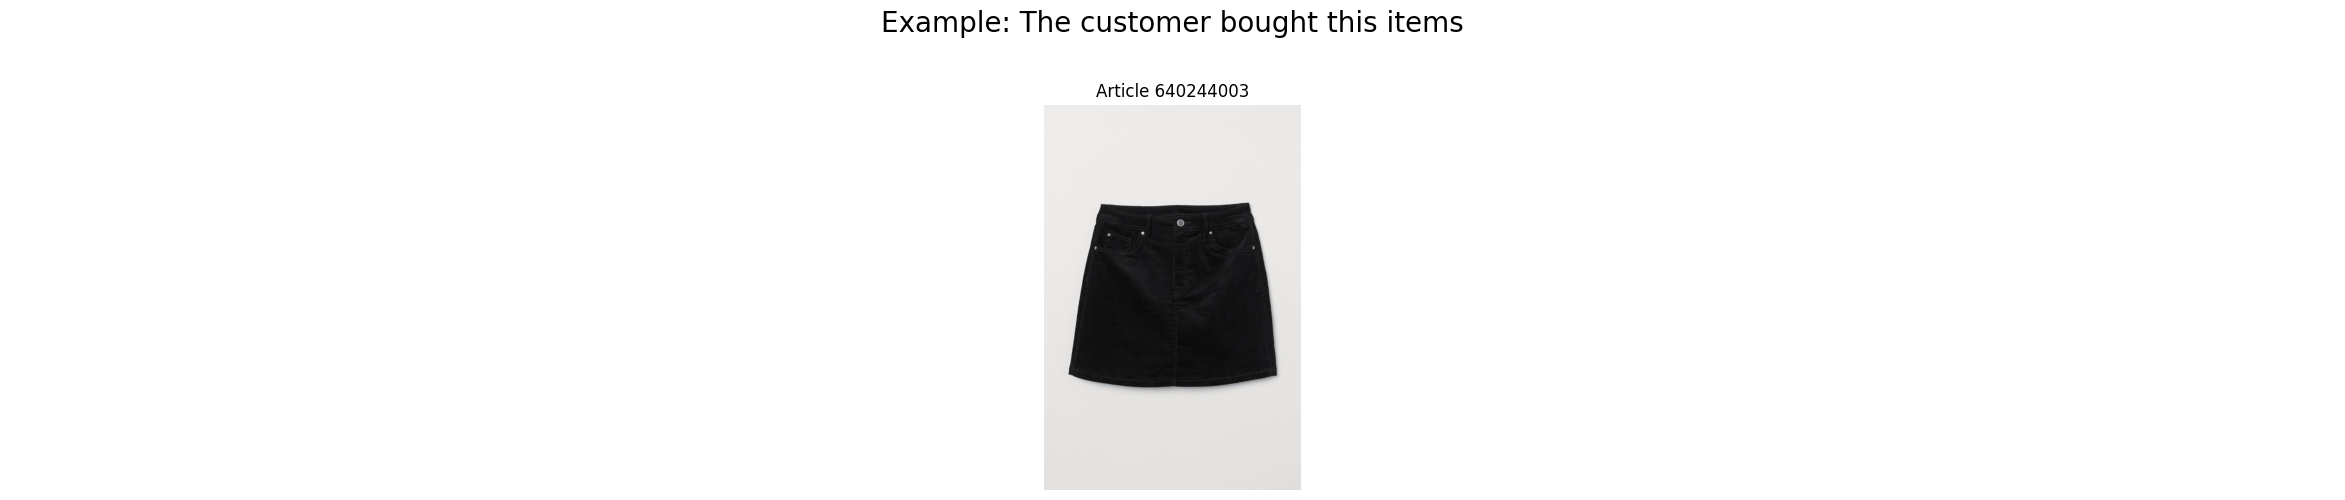

In [102]:
# EXAMPLE: ARTICLE previously purchased by the customer
hist_customer_test=recommender_for_customer(customer_id     = '015e83393e4fc3b071ba6fc5f174bf3bf9813c88dcaf3e61e34c6525984d0ed1', 
                         interact_matrix = customer_items_matrix_df_test, 
                         df_content      = articles)


prev_items = hist_customer_test.index.values
k=len(prev_items)
fig = plt.figure(figsize=(30, 5))

plt.title('Example: The customer bought this items\n\n',size=20)
plt.axis('off')

for item, i in zip(prev_items, range(1, k+1)):
    article_id = str(item)
    path = "images/0" + str(article_id[:2]) + "/0" +article_id + ".jpg"
    image = plt.imread(path)
    fig.add_subplot(1, k, i)
    plt.title('Article %i'%item,size=12)
    plt.axis('off') 
    plt.imshow(image)

In [84]:
#EXAMPLE: SEE THE LIST OF ARTICLES previously purchased by the customer
hist_customer_test

score        prod_name
article_id                        
640244003     1.0  CORY CORD SKIRT

# Recommended Articles (Sorted by Best Score)

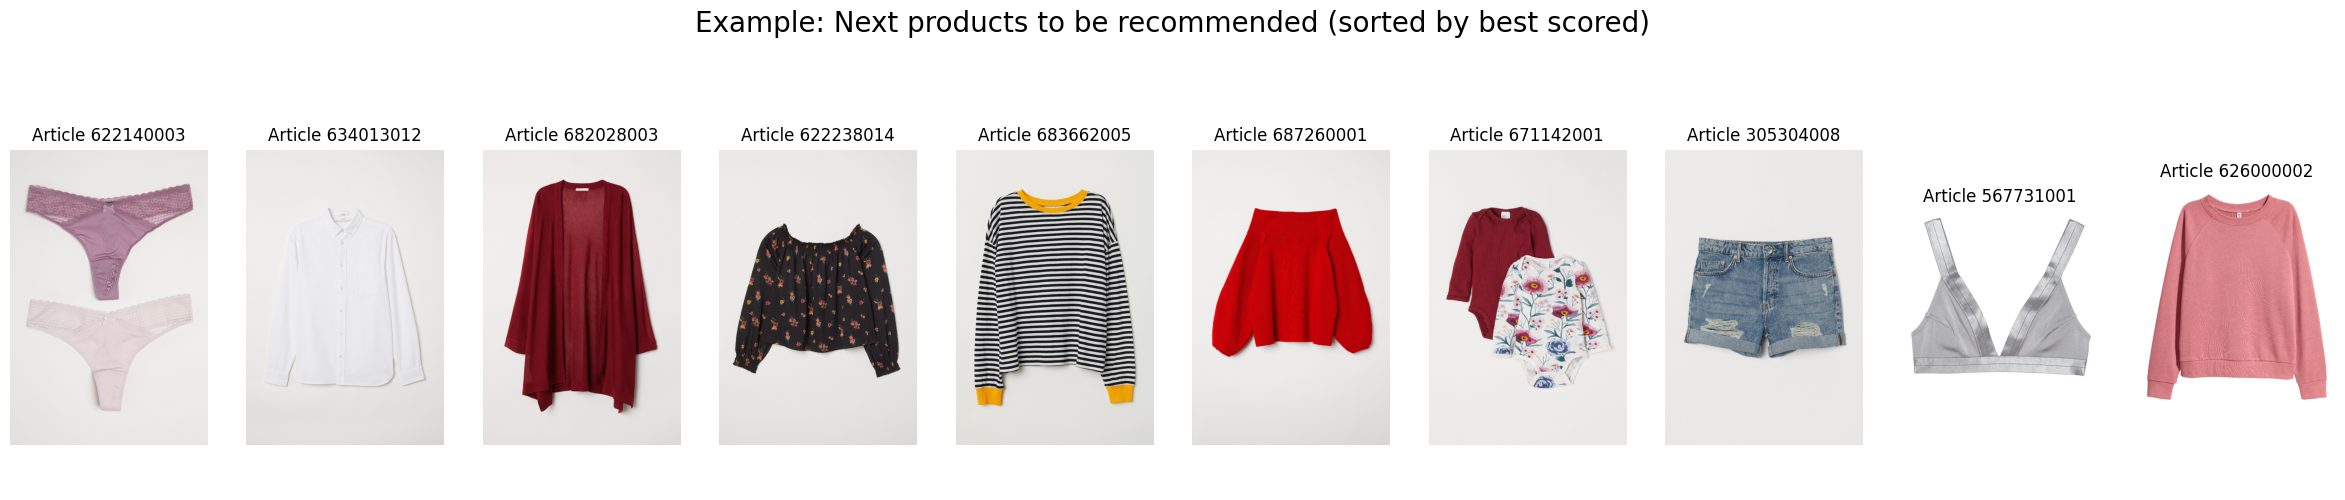

In [85]:
#EXAMPLE: Recommended Articles (SORTED BY BEST SCORED)
hist_customer_rec_test=recommender_for_customer(customer_id     = '015e83393e4fc3b071ba6fc5f174bf3bf9813c88dcaf3e61e34c6525984d0ed1', 
                         interact_matrix = new_customer_items_matrix_df_test, 
                         df_content      = articles)

next_items = hist_customer_rec_test.index.values
k=len(next_items)
fig = plt.figure(figsize=(30, 5))

plt.title('Example: Next products to be recommended\n\n',size=20)
plt.axis('off')

for item, i in zip(next_items, range(1, k+1)):
    try:
        article_id = str(item)
        path = "images/0" + str(article_id[:2]) + "/0" +article_id + ".jpg"
        image = plt.imread(path)
        fig.add_subplot(1, k, i)    
        plt.title('Article %i'%item,size=12)
        plt.axis('off') 
        plt.imshow(image)
    except: 
        pass

In [86]:
hist_customer_rec_test

score                      prod_name
article_id                                         
622140003   0.091994  Strawberry Thong Maple Low 2p
634013012   0.087395         Pat ls bd oxford solid
682028003   0.079068                 Plain throw on
622238014   0.078906                   Molly LS (1)
683662005   0.076515                      Doris L/S
687260001   0.075962             Prince Charles (1)
671142001   0.074353                Sam 2-Pack Body
305304008   0.074236               Boy Denim Shorts
567731001   0.072173          Fantastic Elastic Top
626000002   0.071005              Carolina sweater.